# Task 
- Load the dataset into the platform and perform basic exploratory data analysis (EDA) to understand the structure of the data. This includes checking the dimensions of the dataset, examining the data types, and identifying missing values.

- Filter the data to include only the relevant observations. This can be done by removing missing values or filtering based on certain criteria or conditions that are specific to your dataset.

- Aggregate the data to obtain summary statistics or metrics. You should run different aggregations using functions such as filter(), select(), groupby(), etc. For example, you can calculate the mean, median, or mode of certain variables to gain a better understanding of the data.

- Join the data with another dataset (if available) to perform more complex analysis. This can be done by merging two tables using a common key.

- Visualize the data using either Apache Spark’s built-in plotting library or any other visualization tools of your choice. You can plot a histogram, scatter plot, line plot, or any other types of charts that are relevant to your dataset. This will help you to identify trends and patterns in the data and gain insights into the underlying relationships between different variables.

# Imports

In [ ]:
!pip install polars --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 32.3 MB/s eta 0:00:00


In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Importing Datasets

## Master Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/NadiaHolmlund/M6_Group_Assignments/main/Group_Assignment_2/Data/Master.csv", encoding="ISO-8859-1") #importing data with pandas

data.to_csv('baseball_master.csv', index=False) #saving it locally

baseball_master = pl.read_csv("/content/baseball_master.csv") #reading the file with polar and showing top 5 rows
baseball_master.head(5)

lahmanID,playerID,managerID,hofID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameNote,nameGiven,nameNick,weight,height,bats,throws,debut,finalGame,college,lahman40ID,lahman45ID,retroID,holtzID,bbrefID
i64,str,str,str,f64,f64,f64,str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str
1,"""aaronha01""",null,"""aaronha01h""",1934.0,2.0,5.0,"""USA""","""AL""","""Mobile""",null,null,null,null,null,null,"""Hank""","""Aaron""",null,"""Henry Louis""","""Hammer,Hammeri…",180.0,72.0,"""R""","""R""","""4/13/1954""","""10/3/1976""",null,"""aaronha01""","""aaronha01""","""aaroh101""","""aaronha01""","""aaronha01"""
2,"""aaronto01""",null,null,1939.0,8.0,5.0,"""USA""","""AL""","""Mobile""",1984.0,8.0,16.0,"""USA""","""GA""","""Atlanta""","""Tommie""","""Aaron""",null,"""Tommie Lee""",null,190.0,75.0,"""R""","""R""","""4/10/1962""","""9/26/1971""",null,"""aaronto01""","""aaronto01""","""aarot101""","""aaronto01""","""aaronto01"""
3,"""aasedo01""",null,null,1954.0,9.0,8.0,"""USA""","""CA""","""Orange""",null,null,null,null,null,null,"""Don""","""Aase""",null,"""Donald William…",null,190.0,75.0,"""R""","""R""","""7/26/1977""","""10/3/1990""","""Cal St. Fuller…","""aasedo01""","""aasedo01""","""aased001""","""aasedo01""","""aasedo01"""
4,"""abadan01""",null,null,1972.0,8.0,25.0,"""USA""","""FL""","""West Palm Beac…",null,null,null,null,null,null,"""Andy""","""Abad""",null,null,null,184.0,73.0,"""L""","""L""","""9/10/2001""","""4/13/2006""","""Middle Georgia…","""abadan01""","""abadan01""","""abada001""","""abadan01""","""abadan01"""
5,"""abadijo01""",null,null,1854.0,11.0,4.0,"""USA""","""PA""","""Philadelphia""",1905.0,5.0,17.0,"""USA""","""NJ""","""Pemberton""","""John""","""Abadie""",null,"""John""",null,192.0,72.0,"""R""","""R""","""4/26/1875""","""6/10/1875""",null,"""abadijo01""","""abadijo01""","""abadj101""","""abadijo01""","""abadijo01"""


In [ ]:
rowCount_master = baseball_master.shape[0]
print("Total number of rows in the dataset:", rowCount_master)

Total number of rows in the dataset: 18125


In [ ]:
baseball_master.columns #Looking at the columns

['lahmanID',
 'playerID',
 'managerID',
 'hofID',
 'birthYear',
 'birthMonth',
 'birthDay',
 'birthCountry',
 'birthState',
 'birthCity',
 'deathYear',
 'deathMonth',
 'deathDay',
 'deathCountry',
 'deathState',
 'deathCity',
 'nameFirst',
 'nameLast',
 'nameNote',
 'nameGiven',
 'nameNick',
 'weight',
 'height',
 'bats',
 'throws',
 'debut',
 'finalGame',
 'college',
 'lahman40ID',
 'lahman45ID',
 'retroID',
 'holtzID',
 'bbrefID']

In [ ]:
baseball_master.dtypes #Looking at the types of the columns

[Int64,
 Utf8,
 Utf8,
 Utf8,
 Float64,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Utf8,
 Float64,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8]

## Batting Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/NadiaHolmlund/M6_Group_Assignments/main/Group_Assignment_2/Data/Batting.csv", encoding="ISO-8859-1") #importing data with pandas

data.to_csv('baseball_batting.csv', index=False) #saving it locally

baseball_batting = pl.read_csv("/content/baseball_batting.csv") #reading the file with polar and showing top 5 rows
baseball_batting.head(5)

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""aardsda01""",2004,1,"""SFN""","""NL""",11,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
"""aardsda01""",2006,1,"""CHN""","""NL""",45,43.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
"""aardsda01""",2007,1,"""CHA""","""AL""",25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"""aardsda01""",2008,1,"""BOS""","""AL""",47,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
"""aardsda01""",2009,1,"""SEA""","""AL""",73,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null


In [ ]:
rowCount_batting = baseball_batting.shape[0]
print("Total number of rows in the dataset:", rowCount_batting)

Total number of rows in the dataset: 96600


In [ ]:
baseball_batting.columns #Looking at the columns

['playerID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'G',
 'G_batting',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF',
 'GIDP',
 'G_old']

In [ ]:
baseball_batting.dtypes #Looking at the types of the columns

[Utf8,
 Int64,
 Int64,
 Utf8,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64]

## Merging Datasets

In [ ]:
baseball = baseball_master.join(baseball_batting, on = 'playerID') #we merge the 2 files

In [ ]:
print(baseball.head(5)) 

shape: (5, 56)
┌──────────┬───────────┬───────────┬───────┬───┬─────┬─────┬──────┬───────┐
│ lahmanID ┆ playerID  ┆ managerID ┆ hofID ┆ … ┆ SH  ┆ SF  ┆ GIDP ┆ G_old │
│ ---      ┆ ---       ┆ ---       ┆ ---   ┆   ┆ --- ┆ --- ┆ ---  ┆ ---   │
│ i64      ┆ str       ┆ str       ┆ str   ┆   ┆ f64 ┆ f64 ┆ f64  ┆ f64   │
╞══════════╪═══════════╪═══════════╪═══════╪═══╪═════╪═════╪══════╪═══════╡
│ 17157    ┆ aardsda01 ┆ null      ┆ null  ┆ … ┆ 0.0 ┆ 0.0 ┆ 0.0  ┆ 11.0  │
│ 17157    ┆ aardsda01 ┆ null      ┆ null  ┆ … ┆ 1.0 ┆ 0.0 ┆ 0.0  ┆ 45.0  │
│ 17157    ┆ aardsda01 ┆ null      ┆ null  ┆ … ┆ 0.0 ┆ 0.0 ┆ 0.0  ┆ 2.0   │
│ 17157    ┆ aardsda01 ┆ null      ┆ null  ┆ … ┆ 0.0 ┆ 0.0 ┆ 0.0  ┆ 5.0   │
│ 17157    ┆ aardsda01 ┆ null      ┆ null  ┆ … ┆ 0.0 ┆ 0.0 ┆ 0.0  ┆ null  │
└──────────┴───────────┴───────────┴───────┴───┴─────┴─────┴──────┴───────┘


In [ ]:
rowCount = baseball.shape[0]
print("Total number of rows in the dataset:", rowCount)

Total number of rows in the dataset: 96609


In [ ]:
baseball.columns #Looking at the columns of the merged datasets

['lahmanID',
 'playerID',
 'managerID',
 'hofID',
 'birthYear',
 'birthMonth',
 'birthDay',
 'birthCountry',
 'birthState',
 'birthCity',
 'deathYear',
 'deathMonth',
 'deathDay',
 'deathCountry',
 'deathState',
 'deathCity',
 'nameFirst',
 'nameLast',
 'nameNote',
 'nameGiven',
 'nameNick',
 'weight',
 'height',
 'bats',
 'throws',
 'debut',
 'finalGame',
 'college',
 'lahman40ID',
 'lahman45ID',
 'retroID',
 'holtzID',
 'bbrefID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'G',
 'G_batting',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF',
 'GIDP',
 'G_old']

# Selecting & Filtering Data

In [ ]:
baseball.select(pl.col(['nameFirst', 'nameLast','HR']).sort_by('HR', descending=True)) #looking at the players with the most homeruns

nameFirst,nameLast,HR
str,str,f64
"""Barry""","""Bonds""",73.0
"""Mark""","""McGwire""",70.0
"""Sammy""","""Sosa""",66.0
"""Mark""","""McGwire""",65.0
"""Sammy""","""Sosa""",64.0
"""Sammy""","""Sosa""",63.0
"""Roger""","""Maris""",61.0
"""Babe""","""Ruth""",60.0
"""Babe""","""Ruth""",59.0


In [ ]:
baseball.filter(
    (pl.col('college') == 'UCLA') &
    (pl.col('HR') >= 30) &
    (pl.col('yearID') >= 2000)

) #filtering all players who played for UCLA at college who hit more then 30 HR and is after the year 2000

lahmanID,playerID,managerID,hofID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameNote,nameGiven,nameNick,weight,height,bats,throws,debut,finalGame,college,lahman40ID,lahman45ID,retroID,holtzID,bbrefID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
i64,str,str,str,f64,f64,f64,str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
7285,"""karroer01""",null,"""karroer01h""",1967.0,11.0,4.0,"""USA""","""NJ""","""Hackensack""",null,null,null,null,null,null,"""Eric""","""Karros""",null,"""Eric Peter""",null,205.0,76.0,"""R""","""R""","""9/1/1991""","""7/21/2004""","""UCLA""","""karroer01""","""karroer01""","""karre001""","""karroer01""","""karroer01""",2000,1,"""LAN""","""NL""",155,155.0,584.0,84.0,146.0,29.0,0.0,31.0,106.0,4.0,3.0,63.0,122.0,2.0,4.0,0.0,12.0,18.0,155.0
16719,"""utleych01""",null,null,1978.0,12.0,17.0,"""USA""","""CA""","""Pasadena""",null,null,null,null,null,null,"""Chase""","""Utley""",null,"""Chase Cameron""",null,190.0,73.0,"""L""","""R""","""4/4/2003""",null,"""UCLA""",null,null,"""utlec001""",null,"""utleych01""",2006,1,"""PHI""","""NL""",160,160.0,658.0,131.0,203.0,40.0,4.0,32.0,102.0,15.0,4.0,63.0,132.0,1.0,14.0,0.0,4.0,9.0,160.0
16719,"""utleych01""",null,null,1978.0,12.0,17.0,"""USA""","""CA""","""Pasadena""",null,null,null,null,null,null,"""Chase""","""Utley""",null,"""Chase Cameron""",null,190.0,73.0,"""L""","""R""","""4/4/2003""",null,"""UCLA""",null,null,"""utlec001""",null,"""utleych01""",2008,1,"""PHI""","""NL""",159,159.0,607.0,113.0,177.0,41.0,4.0,33.0,104.0,14.0,2.0,64.0,104.0,14.0,27.0,1.0,8.0,9.0,159.0
16719,"""utleych01""",null,null,1978.0,12.0,17.0,"""USA""","""CA""","""Pasadena""",null,null,null,null,null,null,"""Chase""","""Utley""",null,"""Chase Cameron""",null,190.0,73.0,"""L""","""R""","""4/4/2003""",null,"""UCLA""",null,null,"""utlec001""",null,"""utleych01""",2009,1,"""PHI""","""NL""",156,156.0,571.0,112.0,161.0,28.0,4.0,31.0,93.0,23.0,0.0,88.0,110.0,3.0,24.0,0.0,4.0,5.0,null


In [ ]:
baseball.filter(
    (pl.col('college') == 'UCLA') &
    (pl.col('yearID') > 2000)).select(['nameGiven', 'weight', 'height', 'bats', 'debut', 'yearID']
)
# filtering the same as before, but with more information

nameGiven,weight,height,bats,debut,yearID
str,f64,f64,str,str,i64
"""Hector""",235.0,74.0,"""L""","""4/30/2010""",2010
"""Hector""",235.0,74.0,"""L""","""4/30/2010""",2012
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2003
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2004
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2005
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2006
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2007
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2008
"""Garrett Bernar…",215.0,75.0,"""R""","""8/3/2003""",2009


# Player EDA

## Min & Max Weight by Birth Country

In [ ]:
min_max_weight_by_country = baseball.groupby('birthCountry').agg([pl.col('weight').min().alias('weight_min'), pl.col('weight').max().alias('weight_max')]).sort(by = 'weight_max', reverse = True)
min_max_weight_by_country #groupby country and the min / max weight of players

<ipython-input-18-2dfd2c0e028c>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  min_max_weight_by_country = baseball.groupby('birthCountry').agg([pl.col('weight').min().alias('weight_min'), pl.col('weight').max().alias('weight_max')]).sort(by = 'weight_max', reverse = True)


birthCountry,weight_min,weight_max
str,f64,f64
"""USA""",65.0,320.0
"""V.I.""",140.0,283.0
"""Venezuela""",140.0,280.0
"""D.R.""",145.0,275.0
"""Panama""",150.0,265.0
"""CAN""",141.0,260.0
"""P.R.""",140.0,260.0
"""Cuba""",134.0,255.0
"""Mexico""",144.0,250.0


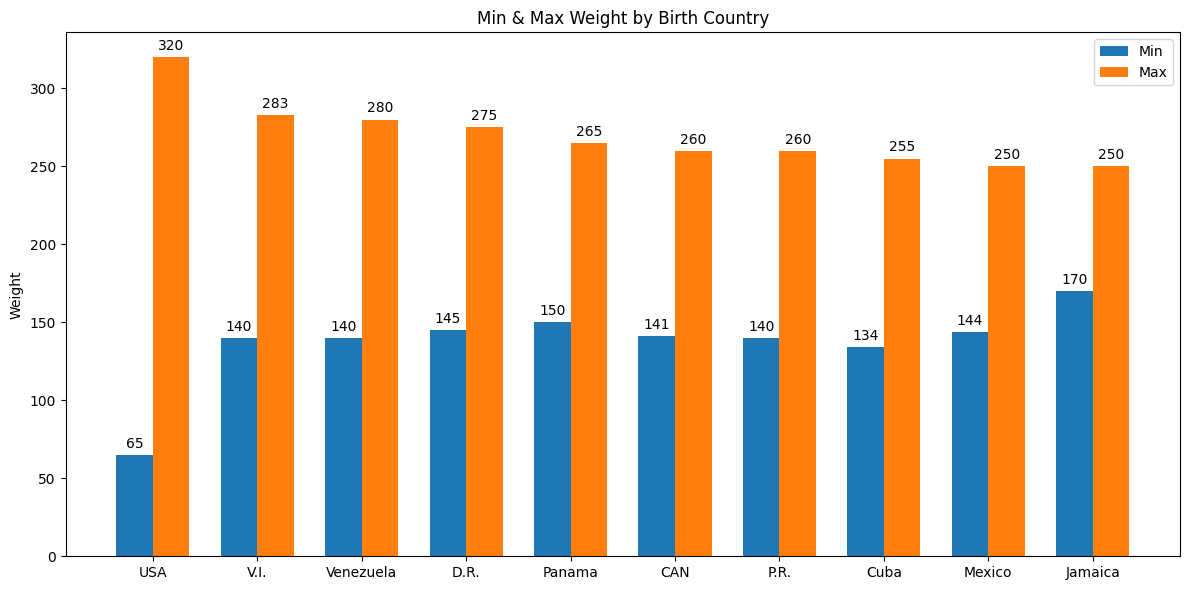

In [ ]:
# Visualizing the minimum and maximum weight by birth country (displaying only the top 10 countries with the highest weigth)
min_max_weight_by_country_viz = min_max_weight_by_country.head(10)

labels = min_max_weight_by_country_viz['birthCountry']
min_weight = min_max_weight_by_country_viz['weight_min']
max_weight = min_max_weight_by_country_viz['weight_max']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, min_weight, width, label='Min')
rects2 = ax.bar(x + width/2, max_weight, width, label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weight')
ax.set_title('Min & Max Weight by Birth Country')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Mean Height & Weight Distribution of US Born, Boston Red Sox Players

In [ ]:
HeightWeightDistribution = baseball.filter((pl.col('birthCountry') == 'USA') & (pl.col('teamID') == 'BOS')).select(['playerID', 'weight', 'height'])
HeightWeightDistribution = HeightWeightDistribution.groupby('playerID').mean()
HeightWeightDistribution.head(10) 

playerID,weight,height
str,f64,f64
"""mccalwi01""",180.0,72.0
"""wadeja01""",175.0,74.0
"""woodjo02""",180.0,71.0
"""mcgeewi01""",175.0,73.0
"""muellbi02""",175.0,71.0
"""woodspi01""",225.0,77.0
"""erdosto01""",205.0,73.0
"""geygach01""",170.0,71.0
"""hinklgo01""",185.0,72.0


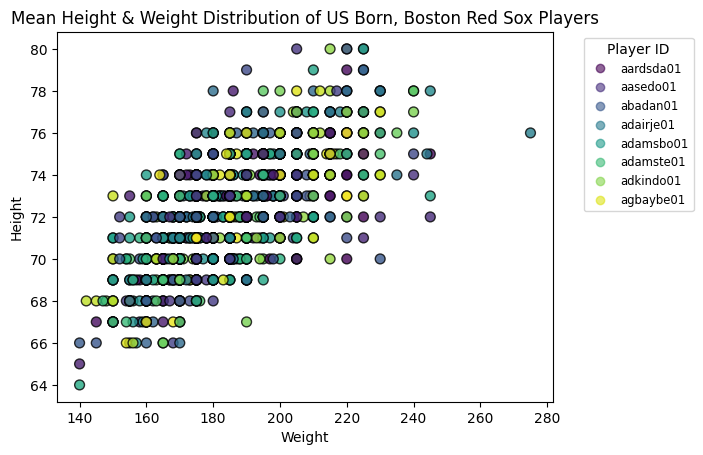

In [ ]:
# Convert Polars DataFrame to Pandas DataFrame
HeightWeightDistribution_viz = HeightWeightDistribution.to_pandas()

# Convert playerID column to categorical data type
HeightWeightDistribution_viz['playerID'] = pd.Categorical(HeightWeightDistribution_viz['playerID'])

# Create scatter plot
fig, ax = plt.subplots()

scatter = ax.scatter(HeightWeightDistribution_viz['weight'], HeightWeightDistribution_viz['height'], 
                      c=HeightWeightDistribution_viz['playerID'].cat.codes, alpha=0.8, 
                      s=50, marker='o', edgecolors='black')

# Add labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Mean Height & Weight Distribution of US Born, Boston Red Sox Players')

# Create legend for playerID
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, HeightWeightDistribution_viz['playerID'].cat.categories, title="Player ID", loc="upper left", fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()

## Bats Distribution

In [ ]:
BatsDistribution = baseball.groupby('bats').agg(pl.col('playerID').n_unique().alias('unique_playerID'))
BatsDistribution 

bats,unique_playerID
str,u32
"""L""",4619
"""B""",1105
"""R""",10984
null,1199


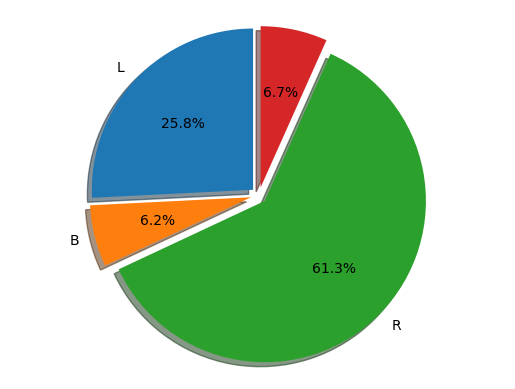

In [ ]:
# Visualizing the bats distribution in a pie chart
labels = BatsDistribution['bats']
sizes = BatsDistribution['unique_playerID']
explode = (0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Performance EDA

## Top 10 Teams by Home Runs

In [ ]:
HRbyTeam = baseball.groupby('teamID').agg(pl.col('HR').sum()).sort(by = 'HR', reverse = True)
HRbyTeam.head(10)

<ipython-input-36-de111a89e197>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  HRbyTeam = baseball.groupby('teamID').agg(pl.col('HR').sum()).sort(by = 'HR', reverse = True)


teamID,HR
str,f64
"""NYA""",14715.0
"""CHN""",13030.0
"""DET""",12678.0
"""BOS""",12421.0
"""PHI""",12108.0
"""CIN""",11930.0
"""CLE""",11879.0
"""SLN""",10790.0
"""PIT""",10421.0


<ipython-input-42-5a887451084a>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


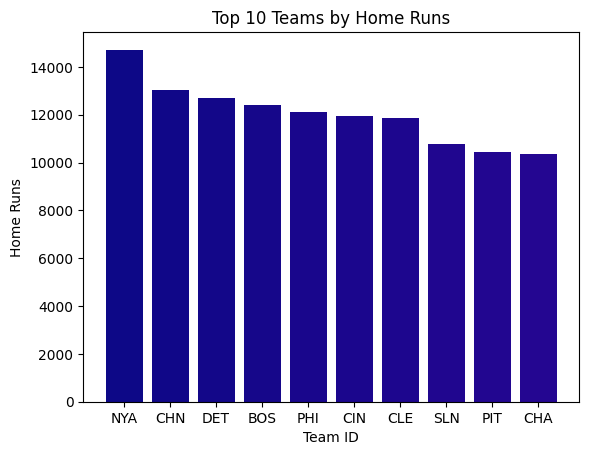

In [ ]:
# Visualizing the top 10 teams by home runs in a bar chart
HRbyTeam_viz = HRbyTeam.head(10)

fig, ax = plt.subplots()
cmap = cm.get_cmap('plasma')
ax.bar(HRbyTeam_viz['teamID'], HRbyTeam_viz['HR'], color=cmap(range(len(HRbyTeam_viz))))
ax.set_xlabel('Team ID')
ax.set_ylabel('Home Runs')
ax.set_title('Top 10 Teams by Home Runs')
plt.show()

## Top 10 UCLA Players by Home Runs from Year>2000

In [ ]:
HRbyPlayer_UCLA = baseball.filter(
    (pl.col('college') == 'UCLA') &
    (pl.col('yearID') > 2000)).groupby('playerID').agg(pl.col('HR').sum()).sort(by = 'HR', reverse = True)
HRbyPlayer_UCLA.head(10)

<ipython-input-111-7eb571097730>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  HRbyPlayer_UCLA = baseball.filter(


playerID,HR
str,f64
"""utleych01""",199.0
"""byrneer01""",109.0
"""atkinga01""",99.0
"""coninje01""",82.0
"""francbe01""",49.0
"""zeileto01""",48.0
"""karroer01""",42.0
"""valener01""",13.0
"""haselbi01""",6.0


<ipython-input-112-3a936fb4f2ab>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


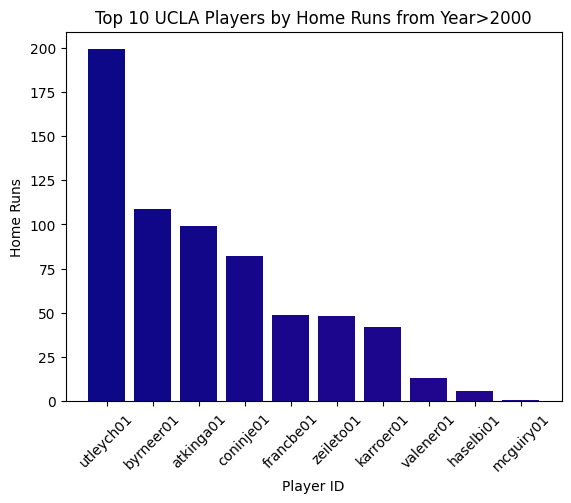

In [ ]:
# Visualizing the top 10 UCLA players by home runs from year>2000 in a bar chart
HRbyPlayer_UCLA_viz = HRbyPlayer_UCLA.head(10)

fig, ax = plt.subplots()
cmap = cm.get_cmap('plasma')
ax.bar(HRbyPlayer_UCLA_viz['playerID'], HRbyPlayer_UCLA_viz['HR'], color=cmap(range(len(HRbyTeam_viz))))
ax.set_xlabel('Player ID')
ax.set_ylabel('Home Runs')
ax.set_title('Top 10 UCLA Players by Home Runs from Year>2000')
plt.xticks(rotation=45)
plt.show()